In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/bazos/Documents/github/mini-ml-projects/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version
path = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

Path to dataset files: /Users/bazos/.cache/kagglehub/datasets/crawford/emnist/versions/3


# Importing 'By_Class' Dataset

The 'By_Class' dataset contains all the digit classes and letter classes with merging of classes, and uneven data.

In [4]:
by_class_train = pd.read_csv(path + "/emnist-byclass-train.csv", header=None)
by_class_test = pd.read_csv(path + "/emnist-byclass-test.csv", header=None)
by_class_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Make a dictionary for all values
labels = {}
with open(path+"/emnist-byclass-mapping.txt", "r") as f:
    for line in f:
        label, ascii_code = map(int, line.strip().split())
        labels[label] = chr(ascii_code)

In [6]:
# Need to add columns
by_class_train.columns = ["label"] + [str(i) for i in range(1, 785)]
by_class_test.columns = ["label"] + [str(i) for i in range(1, 785)]

by_class_train.head()

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Split into X and y
by_class_X_train, by_class_y_train = by_class_train.drop(
    ['label'], axis=1).to_numpy(), by_class_train[['label']].to_numpy()
by_class_X_test, by_class_y_test = by_class_test.drop(
    ['label'], axis=1).to_numpy(), by_class_test[['label']].to_numpy()

Image is 1


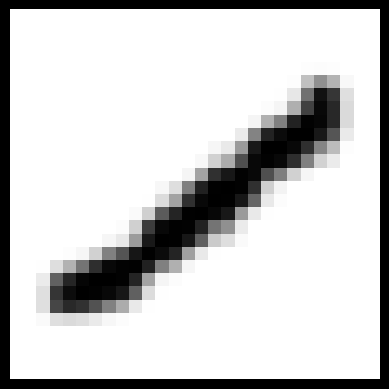

In [8]:
def plot_img(img):
    image = img.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


sample_row = by_class_train.sample()
label, image_data = sample_row["label"].values[0], sample_row.drop(
    ["label"], axis=1).values[0]
plot_img(image_data)
print("Image is", labels[label])
plt.show()

Image seems to be rotated

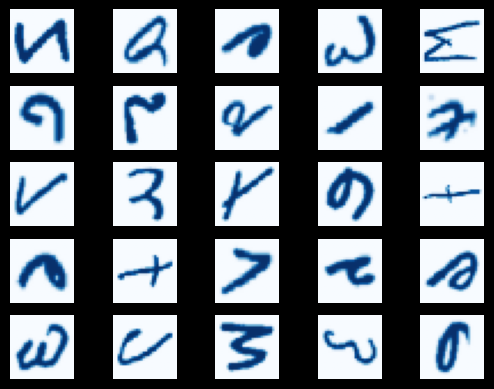

In [9]:
def plot_digits(data, row_size=5):
    for i in range(len(data)):
        ax = plt.subplot(row_size, row_size, i+1)

        digit = data[i]
        digit_image = digit.reshape(28, 28)

        plt.imshow(digit_image, cmap=plt.cm.Blues)
        plt.axis("off")


plot_digits(by_class_X_train[:25])

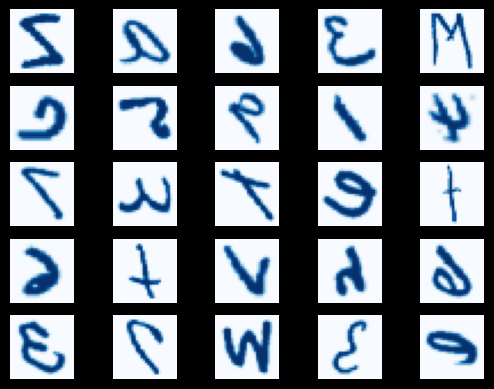

In [10]:
# It seems we need to rotate our image
def rotate(data, rotation=270):
    rotated = []
    for row in data:
        image = row.reshape(28, 28)
        rotated_image = np.rot90(image, k=(rotation // 90))
        rotated.append(rotated_image.flatten())

    return np.stack(rotated)


rotated_by_class_X_train = rotate(by_class_X_train[:25].copy())
plot_digits(rotated_by_class_X_train)

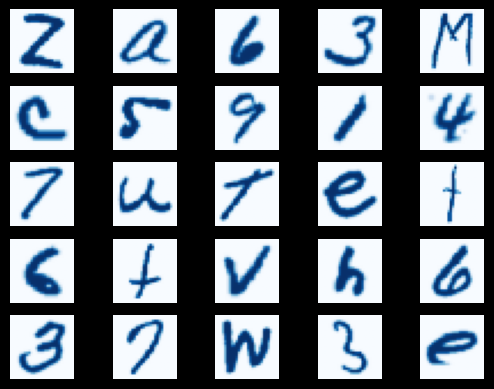

In [11]:
# We need to flip the images horizonatally aswell
def flip(data):
    flipped = []
    for row in data:
        image = row.reshape(28, 28)
        flipped_image = np.flip(image, axis=1)
        flipped.append(flipped_image.flatten())

    return np.stack(flipped)


rotated_and_flipped_by_class_X_train = flip(rotated_by_class_X_train)
plot_digits(rotated_and_flipped_by_class_X_train)

In [12]:
def rotate_and_flip(images, angle=270):
    rotated_images = rotate(images, angle)
    flipped_and_rotated_images = flip(rotated_images)

    return flipped_and_rotated_images


# bc means 'by class'
bc_X_train = rotate_and_flip(by_class_X_train)
bc_X_test = rotate_and_flip(by_class_X_test)

# Training a binary classifier

In [12]:
from sklearn.linear_model import SGDClassifier

bc_y_train_7 = (by_class_y_train == 7).flatten()
bc_y_test_7 = (by_class_y_test == 7).flatten()

In [13]:
sgd_clf = SGDClassifier(random_state=42)

# Use 100000 since takes over 10 mins on full dataset
n = 100000
sgd_clf.fit(bc_X_train[:n], bc_y_train_7[:n])

SGDClassifier(random_state=42)

In [14]:
random_index = np.random.randint(0, bc_X_test.shape[0])
print("Prediction is", (sgd_clf.predict(
    [bc_X_test[random_index]]) == bc_y_test_7[random_index])[0])
# bc_X_test[random_index]

Prediction is True


In [15]:
from sklearn.model_selection import cross_val_score

# Increase number of cross folds 'cv' if desired
cross_val_score(sgd_clf, bc_X_train[:n],
                bc_y_train_7[:n], cv=3, scoring="accuracy")

array([0.98329033, 0.98565986, 0.98622986])

Seems good initially, as random predictions are lining up however we must read into the results more with cross validation score of 98%+. We can use a confusion matrix to see how the classification of 7's is for classifying them (positive values) and rejecting them (negative values).

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred_7 = cross_val_predict(
    sgd_clf, bc_X_train[:n], bc_y_train_7[:n], cv=3)
cm_7 = confusion_matrix(bc_y_train_7[:n], y_train_pred_7)

It seems as if the results are very good with the majority of predictions being correct, however we can see that the dataset is skewed, so a deeper dive into the numbers may reveal something else.

In [33]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

accuracy_7 = accuracy_score(bc_y_train_7[:n], y_train_pred_7)
precision_7 = precision_score(bc_y_train_7[:n], y_train_pred_7)
recall_7 = recall_score(bc_y_train_7[:n], y_train_pred_7)

print("Accuracy", round(accuracy_7, 5))
print("Precision", round(precision_7, 5))
print("Recall", round(recall_7, 5))

Accuracy 0.98506
Precision 0.83942
Recall 0.87431


This shows that our accuracy of our model is extremely high ~98% however the recall (TPR) of positive values is ~87% and precision is ~84% which shows our model struggles with identifying positive values more than negative values. We can also look at some evaluation metrics

In [ ]:
from sklearn.metrics import f1_score

tn, fp, fn, tp = cm_7.ravel()

# False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp/(fp+tn)
fnr = fn/(tp+fn)

f1_7 = f1_score(bc_y_train_7[:n], y_train_pred_7, average="binary")
weighted_f1_7 = f1_score(bc_y_train_7[:n], y_train_pred_7, average="weighted")

print(
    f"False Positive Rate {round(fpr, 5)} and False Negative Rate {round(fnr, 5)}")
print(
    f"F1 score {round(f1_7, 5)} and the weighted F1 {round(weighted_f1_7, 5)}")

False Positive Rate 0.00899 and False Negative Rate 0.12569
F1 score 0.85651 and the weighted F1 0.9852


In [ ]:
# Get decision scores
y_scores = cross_val_predict(
    sgd_clf, bc_X_train[:n], bc_y_train_7[:n], method="decision_function", cv=3)

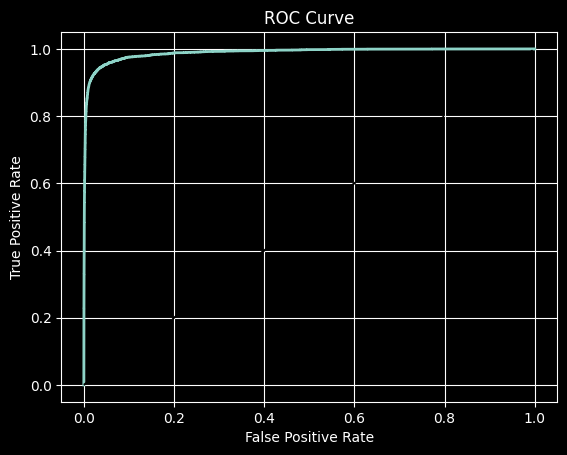

Area under the ROC curve 0.9889772268022066


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(bc_y_train_7[:n], y_scores)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.show()

roc_auc = roc_auc_score(bc_y_train_7[:n], y_scores)

print("Area under the ROC curve", roc_auc)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(bc_y_test_7, sgd_clf.predict(
    bc_X_test), target_names=["not 7", "7"]))

              precision    recall  f1-score   support

       not 7       0.99      0.99      0.99    110184
           7       0.84      0.89      0.87      6139

    accuracy                           0.99    116323
   macro avg       0.92      0.94      0.93    116323
weighted avg       0.99      0.99      0.99    116323



# Training the multi-output classifier
We will compare 4 modes, `LogisiticRegression`, `RandomForestClassifier`, `GaussianNB` and will use a `SVC` and force it to be multi-class by using the `OneVsRestClassifier`.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC


# Setup Models
lg_clf = LogisticRegression(random_state=42, max_iter=250)
rfc_clf = RandomForestClassifier(random_state=42)
gnb = GaussianNB()  # Gaussian NB is determinsitic so there is no need to set a random state
ovr_clf = OneVsOneClassifier(SVC(random_state=42, max_iter=250))

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import time

# List of models
models = [lg_clf, rfc_clf, gnb, ovr_clf]
model_names = ['Logistic Regression', 'Random Forest',
               'Gaussian Naive Bayes', 'One-vs-One SVC']

# One-vs-One SVC takes a considerable amount of time longer than the other 3 models, remove code if desired
models.pop()
model_names.pop()

# Reduce to first m samples
m = 100000
bc_X_train_m, bc_X_test_m = bc_X_train[:m], bc_X_test[:m]
bc_y_train_m, bc_y_test_m = by_class_y_train[:m], by_class_y_test[:m]

results = {}

# Perform cross-validation and fit the models
for model, name in zip(models, model_names):
    res = {}

    # Perform cross-validation
    cv_scores = cross_val_score(
        model, bc_X_train_m, bc_y_train_m.ravel(), n_jobs=-1, cv=3)
    res["cv_scores"] = cv_scores

    print(f"{name} - Cross-validation scores: {cv_scores}")
    print(f"{name} - Average cross-validation score: {cv_scores.mean()}\n")

    start = time.time()
    # Fit the model on the entire training set
    model.fit(bc_X_train_m, bc_y_train_m.ravel())

    res["time"] = round(time.time() - start, 2)

    # Predict on the test set
    y_pred = model.predict(bc_X_test_m)

    # Evaluate the model on the test set
    test_accuracy = accuracy_score(bc_y_test_m, y_pred)
    res["accuracy"] = test_accuracy

    print(f"{name} - Test accuracy: {test_accuracy}\n")

/Users/bazos/Documents/github/mini-ml-projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/bazos/Documents/github/mini-ml-projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://s

Logistic Regression - Cross-validation scores: [0.68593628 0.68562686 0.68589686]
Logistic Regression - Average cross-validation score: 0.6858199988371756



/Users/bazos/Documents/github/mini-ml-projects/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Test accuracy: 0.70204

Random Forest - Cross-validation scores: [0.78376432 0.78441784 0.78138781]
Random Forest - Average cross-validation score: 0.7831899942566954

Random Forest - Test accuracy: 0.79502

Gaussian Naive Bayes - Cross-validation scores: [0.20300594 0.16854169 0.19404194]
Gaussian Naive Bayes - Average cross-validation score: 0.18852985523915358

Gaussian Naive Bayes - Test accuracy: 0.21961



We can see that the random forest classifier seems to have produced the best results in average-cross validation score and test set accuracy, however it is much lover than our 98% accuracy of the Binary Classifier. The Naive Bayes was also surprisingly so low with an accuracy of ---, this could be because of the distribution of the data as we need it to be normally distributed.

We can look at [EMNIST: an extension of MNIST to handwritten letters link](https://arxiv.org/abs/1702.05373v1) by Cohen, G., Afshar, S., Tapson, J. and van Schaik, A. where we can see the following distribution of the data of the by\_class dataset below on page 5.

![image of strucutre of the datasets on page 5 of the EMNIST: an extension of MNIST to handwritten letters link](datasets_structures.png "Dataset Structures")

In [ ]:
# Get stats on different classes